In [1]:
import pyagrum as gum
import pyagrum.lib.notebook as gnb

import sys, os
root_dir = os.path.abspath("..")
if root_dir not in sys.path:
    sys.path.append(root_dir)

from fci import *

%load_ext autoreload
%autoreload 2

import pandas as pd

In [2]:
bn = gum.loadBN("instances/asia.bif")
bn

(pyagrum.BayesNet@0x10213ca00) BN{nodes: 8, arcs: 8, domainSize: 256, dim: 18, mem: 288o}

In [3]:
learner = gum.BNLearner("data/asia-skeleton-test.csv")
learner.useMIIC()
learner.learnPDAG()

(pyagrum.PDAG@0x138810400) {0,1,2,3,4,5,6,7} , {6->1,7->6,0->6,6->4,2->4} , {0--5,2--5,3--7}

In [4]:
graph, sepsets, log = initialSkeleton(learner, verbose=True, record=True)

'lung' cond ind 'asia' | () with p-value=0.05264276366299503 >= 0.05
'lung' cond ind 'tub' | () with p-value=0.12167671498944677 >= 0.05
'xray' cond ind 'asia' | () with p-value=0.9888702038936368 >= 0.05
'bronc' cond ind 'asia' | () with p-value=0.7725580443964737 >= 0.05
'bronc' cond ind 'tub' | () with p-value=0.33299040103109134 >= 0.05
'asia' cond ind 'dysp' | () with p-value=0.05976110505127974 >= 0.05
'asia' cond ind 'smoke' | () with p-value=0.07612705397634423 >= 0.05
'asia' cond ind 'either' | () with p-value=0.2318884597694858 >= 0.05
'smoke' cond ind 'tub' | () with p-value=0.5501336856810819 >= 0.05
'lung' cond ind 'xray' | ('either',) with p-value=0.9695124896440693 >= 0.05
'lung' cond ind 'bronc' | ('smoke',) with p-value=0.4059802654409171 >= 0.05
'lung' cond ind 'dysp' | ('either',) with p-value=0.5726010986834165 >= 0.05
'xray' cond ind 'bronc' | ('smoke',) with p-value=0.606392292495972 >= 0.05
'xray' cond ind 'dysp' | ('either',) with p-value=0.31013697084398434 >= 

In [5]:
df = pd.DataFrame(log, columns=["x", "y", "Z", "p-value"])
df

,x,y,Z,p-value
0,lung,xray,(),0.000000
1,lung,bronc,(),0.000000
2,lung,asia,(),0.052643
3,lung,dysp,(),0.000000
4,lung,smoke,(),0.000000
...,...,...,...,...
67,dysp,smoke,"(bronc, either)",0.303286
68,either,tub,"(lung, dysp)",0.000000
69,either,tub,"(lung, xray)",0.000000
70,either,tub,"(dysp, xray)",0.000000


In [6]:
pag = rule0(graph, sepsets, verbose=True)

[R0]         'bronc' o-o 'dysp' o-o 'either'
             'dysp' not in sepset('bronc', 'either') = {'smoke'}
      orient 'bronc' o-> 'dysp' <-o 'either'
[R0]         'lung' o-o 'either' o-o 'tub'
             'either' not in sepset('lung', 'tub') = set()
      orient 'lung' o-> 'either' <-o 'tub'
[R0]         'asia' o-o 'tub' o-> 'either'
             'tub' not in sepset('asia', 'either') = set()
      orient 'asia' o-> 'tub' <-> 'either'


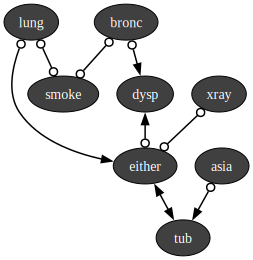

In [7]:
toDot(pag)

In [9]:
# Ici, on observe que 'either' cond indp 'asia' | {}, après le test de chi2.
# C'est pourquoi on a 'either' -> 'tub' <- 'asia'.
# Mais la relation 'either' cond indp 'asia' | {} n'est pas vrai,
# ce qui est vrai c'est 'either' cond indp 'asia' | { 'tub' }
df[(df["x"] == "asia") & (df["y"] == "either")]

,x,y,Z,p-value
20,asia,either,(),0.231888
